In [2]:
import math
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from random import shuffle

In [44]:
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum += math.pow(d[i][1]-m*d[i][0]-c,2)
  return (1/2)*(1/len(d))*sum

In [4]:
def gradm(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)*d[i][0]
  return -1*sum/len(d)

In [5]:
def gradc(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)
  return -1*sum/len(d)

In [6]:
data = pd.read_csv("/content/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
data.corr()['price']

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

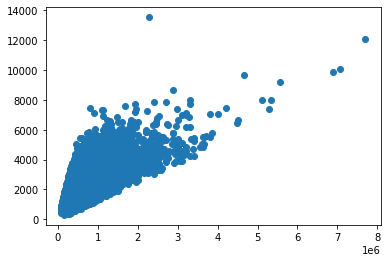

In [28]:
y = data['price']
x = data['sqft_living']

plt.scatter(data['price'],data['sqft_living'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


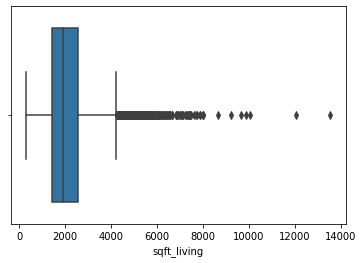

In [29]:
sns.boxplot(x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


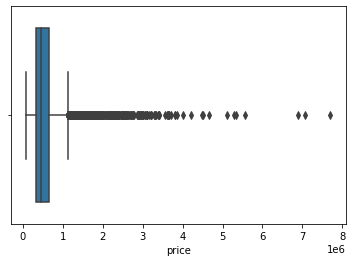

In [30]:
sns.boxplot(y)

In [31]:
threshold = 3
x = list(x)
y = list(y)
x_new = []
y_new = []

z = np.abs(stats.zscore(x))
outliers = np.where(z > threshold)

for i in range(len(x)):
  if i not in outliers[0]:
    x_new.append(x[i])
    y_new.append(y[i])

In [32]:
x = x_new
y = y_new

x_new = []
y_new = []

z = np.abs(stats.zscore(y))
outliers = np.where(z > threshold)
for i in range(len(x)):
  if i not in outliers[0]:
    x_new.append(x[i])
    y_new.append(y[i])

In [33]:
print(len(x_new))
print(len(y_new))

20957
20957


In [35]:
x = x_new
y = y_new

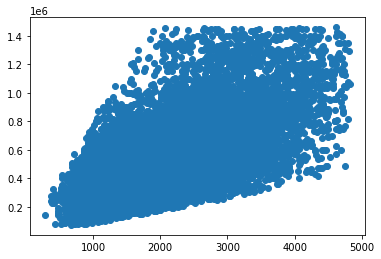

In [42]:
plt.scatter(x,y)

In [47]:
x = minmax_scale(x)
y = minmax_scale(y)

In [48]:
cleaned_data = [(x[i],y[i]) for i in range(len(x))]

In [49]:
cleaned_data_train, cleaned_data_test = train_test_split(cleaned_data,test_size=0.1)

In [50]:
print(len(cleaned_data_train))
print(len(cleaned_data_test))

18861
2096


In [51]:
epochs = 20
learning_rate = 0.01
batch_size = 500
number_of_samples = len(cleaned_data_train)
number_of_batches = number_of_samples//batch_size
m = 1
c = 1

In [52]:
error_list = []
for i in range(epochs):
  for j in range(number_of_batches+1):
    if j == number_of_batches:
      d = cleaned_data_train[j*batch_size:]
    else:
      d = cleaned_data_train[j*batch_size:(j+1)*batch_size]
    deltam = -1*learning_rate*gradm(d,m,c)
    deltac = -1*learning_rate*gradc(d,m,c)
    m = m + deltam
    c = c + deltac
    err = error(d,m,c)
    print("epoch : {}, batch : {} >> error : {}".format(i,j,err))
    error_list.append(err)
  random.shuffle(cleaned_data_train)

epoch : 0, batch : 0 >> error : 0.5658987170709998
epoch : 0, batch : 1 >> error : 0.5688402905304786
epoch : 0, batch : 2 >> error : 0.5371097527738754
epoch : 0, batch : 3 >> error : 0.5363262045003006
epoch : 0, batch : 4 >> error : 0.5143581753816182
epoch : 0, batch : 5 >> error : 0.5086849320389923
epoch : 0, batch : 6 >> error : 0.4901806444146067
epoch : 0, batch : 7 >> error : 0.5038564354471645
epoch : 0, batch : 8 >> error : 0.47671717496009297
epoch : 0, batch : 9 >> error : 0.46969607302518995
epoch : 0, batch : 10 >> error : 0.4601974811538624
epoch : 0, batch : 11 >> error : 0.4395497549776715
epoch : 0, batch : 12 >> error : 0.4366232412480953
epoch : 0, batch : 13 >> error : 0.43516801952669054
epoch : 0, batch : 14 >> error : 0.4244164334067405
epoch : 0, batch : 15 >> error : 0.41433445001277597
epoch : 0, batch : 16 >> error : 0.4039608085158815
epoch : 0, batch : 17 >> error : 0.38804008917867744
epoch : 0, batch : 18 >> error : 0.3840164667412532
epoch : 0, batch 

In [53]:
print(m,c)

0.6382643442381853 0.06334911772614327


Text(0.5, 1.0, 'error graph in case of Mini Batch GD')

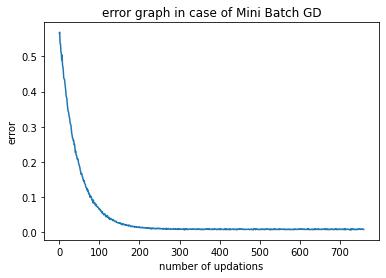

In [54]:
x1 = range(epochs*(number_of_batches+1))
y1 = error_list

plt.plot(x1,y1)
plt.xlabel("number of updations")
plt.ylabel("error")
plt.title("error graph in case of Mini Batch GD")

Text(0.5, 1.0, 'line which is generated after training')

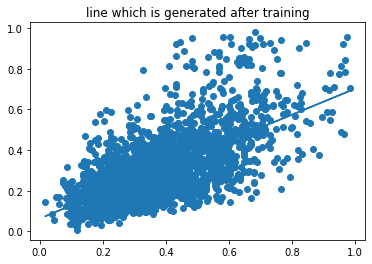

In [58]:
x2 = [a[0] for a in cleaned_data_test]
y2 = [m*i+c for i in x2]

x1 = [a[0] for a in cleaned_data_test]
y1 = [a[1] for a in cleaned_data_test]

plt.plot(x2,y2)

plt.scatter(x1,y1)

plt.title("line which is generated after training")

In [59]:
train_error = error(cleaned_data_train,m,c)
test_error = error(cleaned_data_test,m,c)

print("train error is : ",train_error)
print("test error is : ",test_error)

train error is :  0.00887852100602741
test error is :  0.008765940370275139


In [60]:
input_area = int(input("enter the input area : "))

max_price = 7.700000e+06
min_price = 7.500000e+04

max_area = 13540.000000
min_area = 290.000000

input_area = (input_area - min_area)/(max_area-min_area)
output_price = input_area*m+c

output_price = output_price*(max_price-min_price)+min_price

print("predicted house price is : ",output_price)

enter the input area : 1245
predicted house price is :  908811.45071463
